### RQ 1. Word Frequency: Given the text description of the courses for the Web Development, we want to analyze the frequency of the top words 

In [136]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [137]:
udemy_data = pd.read_csv('./Udemy/udemy_course_all_info.csv')

In [138]:
udemy_data = udemy_data.drop_duplicates(subset=['course_id'])

In [139]:
coursera_data = pd.read_csv('Coursera/coursera_course_all_info.csv')

In [140]:
coursera_data = coursera_data.drop_duplicates(subset=['course_id'])

In [141]:
# Read the Pluralsight data
pluralsight_data = pd.read_csv('PluralSight/pluralsight_course_all_info.csv')

In [142]:
pluralsight_data = pluralsight_data.drop_duplicates(subset=['course_id'])

In [143]:
coursera_data.drop(columns=['Unnamed: 0'], inplace=True)

In [144]:
udemy_data.drop(columns=['Unnamed: 0'], inplace=True)

In [145]:
concatenated_course_data = pd.concat([pluralsight_data, coursera_data, udemy_data], ignore_index=True)

In [146]:
concatenated_course_data['combined_tags'] = concatenated_course_data['course_title'] + " " + concatenated_course_data['course_details']

In [147]:
concatenated_course_data_copy = concatenated_course_data.copy()

In [148]:
# Removing non-ascii characters
concatenated_course_data_copy = concatenated_course_data_copy[concatenated_course_data_copy['course_title'].apply(lambda x: all(ord(char) < 128 for char in x))]

In [149]:
concatenated_course_data_copy.reset_index(drop=True, inplace=True) 

In [150]:
# Define text preprocessing function
def preprocess_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Remove stopwords, perform stemming, and lemmatization
    stop_words = set(stopwords.words('english'))
    # Using both stemmer and lemmatizer as some words like explore won't work correctly for lemmatizer but works well for stemmer and vice-versa
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [151]:
# Apply text preprocessing to the 'combined_tags' column
concatenated_course_data_copy['combined_tags_preprocessed'] = concatenated_course_data_copy['combined_tags'].apply(preprocess_text)

In [152]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shantanujoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
tokens = [word.lower() for desc in concatenated_course_data_copy['combined_tags_preprocessed'] for word in word_tokenize(desc)]


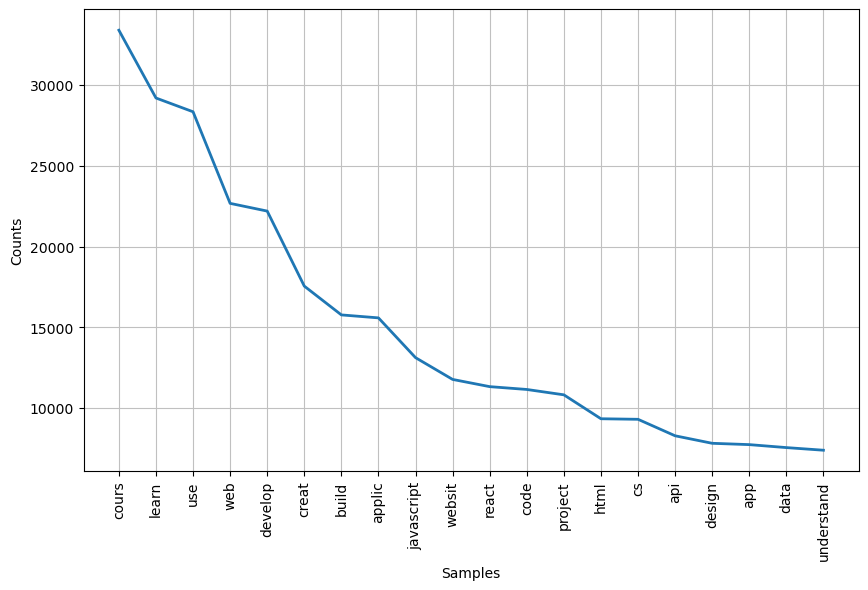

In [154]:
# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Plot the word frequencies
plt.figure(figsize=(10, 6))
freq_dist.plot(20, cumulative=False)
plt.show()

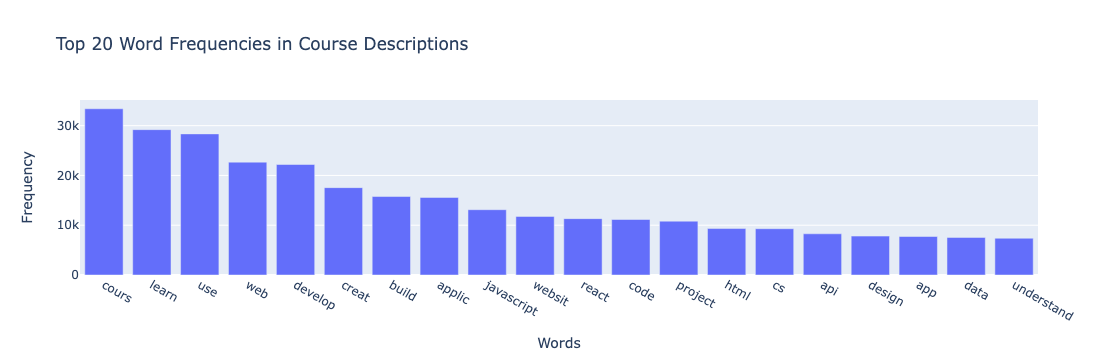

In [155]:
import plotly.express as px

# Calculate word frequencies
freq_dist = FreqDist(tokens)
word_counts = freq_dist.most_common(20)

# Extract words and frequencies
words, frequencies = zip(*word_counts)

# Plot the word frequencies using Plotly
fig = px.bar(x=words, y=frequencies, labels={'x': 'Words', 'y': 'Frequency'}, title='Top 20 Word Frequencies in Course Descriptions')
fig.show()

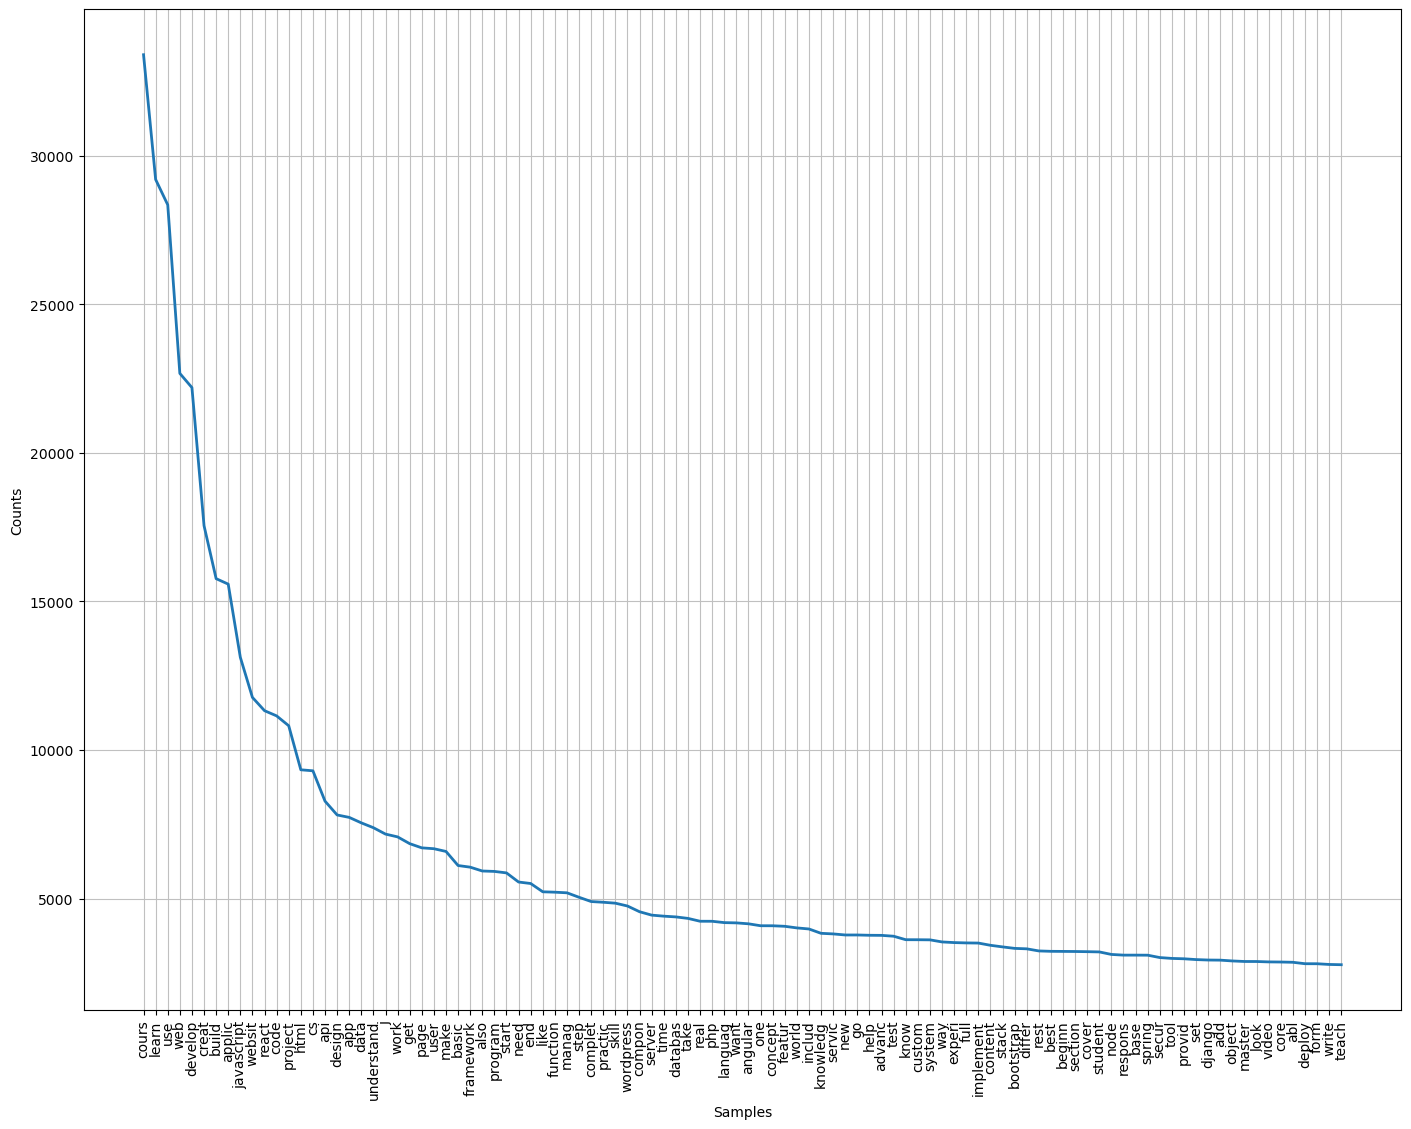

In [156]:
# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Plot the word frequencies
plt.figure(figsize=(17, 13))
freq_dist.plot(100, cumulative=False)
plt.show()

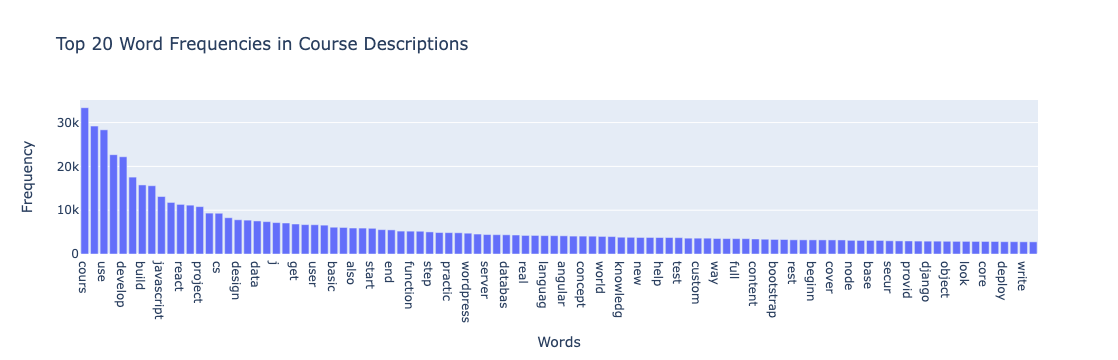

In [157]:
import plotly.express as px

# Calculate word frequencies
freq_dist = FreqDist(tokens)
word_counts = freq_dist.most_common(100)

# Extract words and frequencies
words, frequencies = zip(*word_counts)

# Plot the word frequencies using Plotly
fig = px.bar(x=words, y=frequencies, labels={'x': 'Words', 'y': 'Frequency'}, title='Top 20 Word Frequencies in Course Descriptions')
fig.show()

### RQ 2. Vizualize the course level per course site to see the distribution of course level in all the 3 platforms

In [158]:
# Map course level to text labels
concatenated_course_data_copy['course_level_name'] = concatenated_course_data_copy['course_level'].map({0: 'All', 1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'})

In [159]:

# Extract site from course_id
concatenated_course_data_copy['site'] = concatenated_course_data_copy['course_id'].str.split('_').str[0]

In [160]:
# Group by site and course level and count the number of courses
counts = concatenated_course_data_copy.groupby(['site', 'course_level_name']).size().reset_index(name='count')


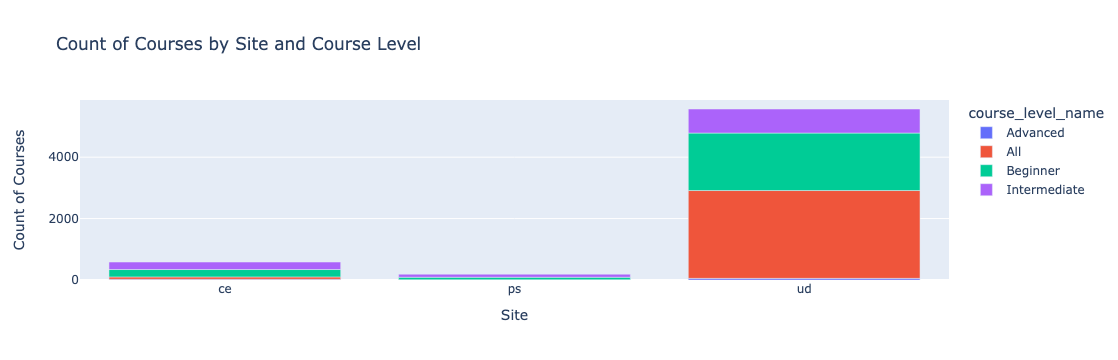

In [161]:
# Plot the bar chart using Plotly
fig = px.bar(counts, x='site', y='count', color='course_level_name', 
             labels={'count': 'Count of Courses', 'site': 'Site', 'course_level': 'Course Level'},
             title='Count of Courses by Site and Course Level')
fig.show()

In [162]:
counts

site course_level_name  count
0    ce          Advanced     22
1    ce               All     78
2    ce          Beginner    241
3    ce      Intermediate    244
4    ps          Advanced     11
5    ps          Beginner     79
6    ps      Intermediate     99
7    ud          Advanced     53
8    ud               All   2861
9    ud          Beginner   1871
10   ud      Intermediate    784

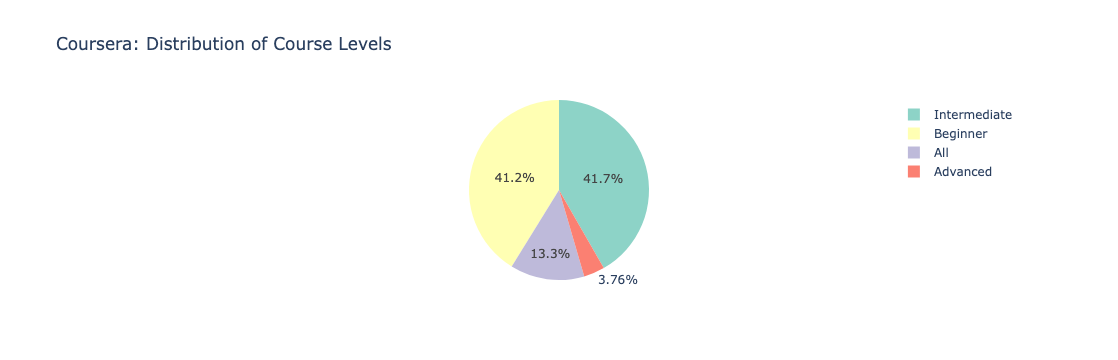

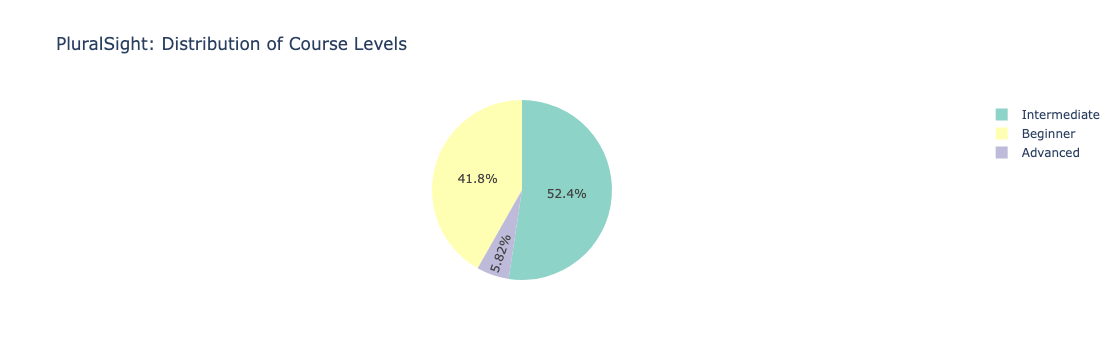

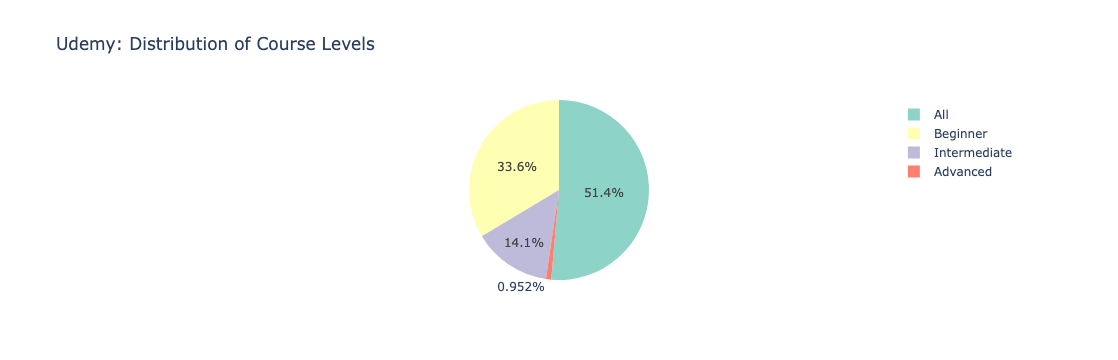

In [163]:
# Define a custom color sequence
colors = px.colors.qualitative.Set3

# Pie plot for Coursera
coursera_df = counts[counts['site'] == 'ce']
fig_coursera = px.pie(coursera_df, values='count', names='course_level_name', 
                      title='Coursera: Distribution of Course Levels',
                      labels={'count': 'Count', 'course_level_name': 'Course Level'},
                      color_discrete_sequence=colors)
fig_coursera.show()

# Pie plot for PluralSight
pluralsight_df = counts[counts['site'] == 'ps']
fig_pluralsight = px.pie(pluralsight_df, values='count', names='course_level_name', 
                         title='PluralSight: Distribution of Course Levels',
                         labels={'count': 'Count', 'course_level_name': 'Course Level'},
                         color_discrete_sequence=colors)
fig_pluralsight.show()

# Pie plot for Udemy
udemy_df = counts[counts['site'] == 'ud']
fig_udemy = px.pie(udemy_df, values='count', names='course_level_name', 
                   title='Udemy: Distribution of Course Levels',
                   labels={'count': 'Count', 'course_level_name': 'Course Level'},
                   color_discrete_sequence=colors)
fig_udemy.show()


#### RQ 3. Vizualize the scatter plots to see the popularity in terms of people rating and highest levels of ratings
- Scatter plot between course rating and number of reviews

In [181]:
df  = concatenated_course_data_copy.copy()

In [182]:
df.shape

(6343, 14)

In [183]:
df = df.dropna(subset=['course_rating'])

In [184]:
df = df.dropna(subset=['course_no_of_reviews'])

In [185]:
df = df.dropna(subset=['course_rating', 'course_no_of_reviews'])
df = df[(df['course_rating'] != 0) & (df['course_no_of_reviews'] != 0)]

In [186]:
df.shape

(5900, 14)

In [187]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

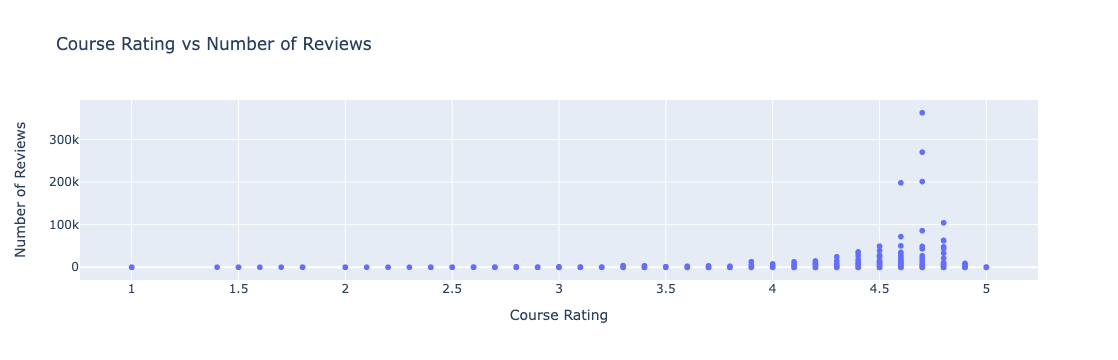

In [188]:
# Round course_rating to 1 decimal place
df['course_rating'] = df['course_rating'].round(1)

# Scatter plot between course rating and number of reviews
fig1 = px.scatter(df, x='course_rating', y='course_no_of_reviews', 
                  title='Course Rating vs Number of Reviews',
                  labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'})
fig1.show()

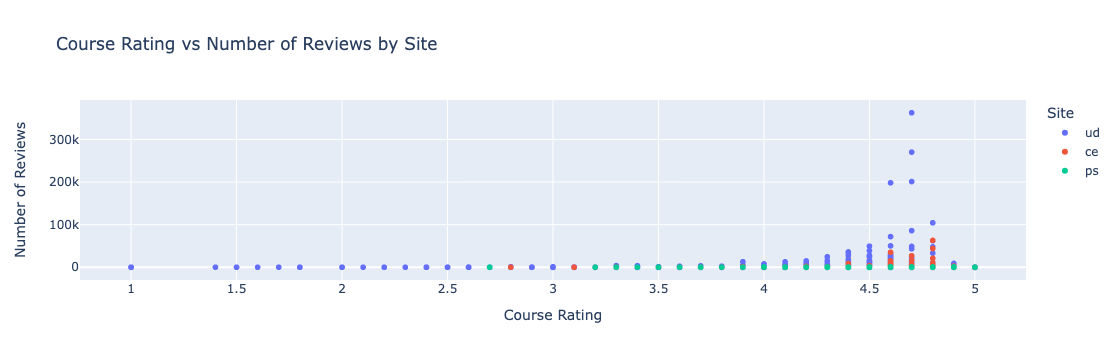

In [189]:
# Scatter plot between course rating and number of reviews by site
fig = px.scatter(df, x='course_rating', y='course_no_of_reviews', color='site', 
                 title='Course Rating vs Number of Reviews by Site',
                 labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews', 'site': 'Site'})
fig.show()

In [190]:
# Create separate DataFrames for each site
udemy_df = df[df['site'] == 'ud']
coursera_df = df[df['site'] == 'ce']
pluralsight_df = df[df['site'] == 'ps']

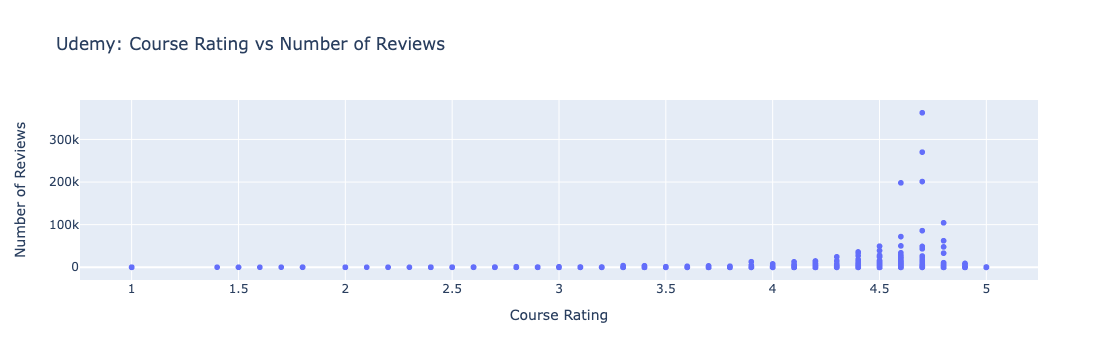

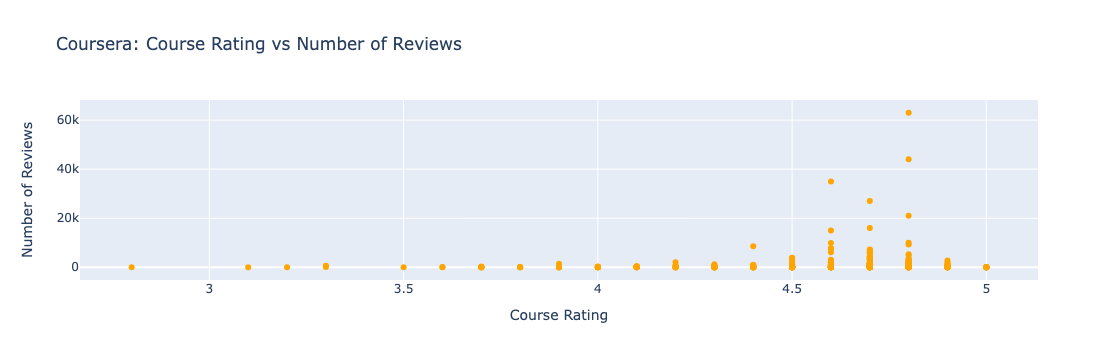

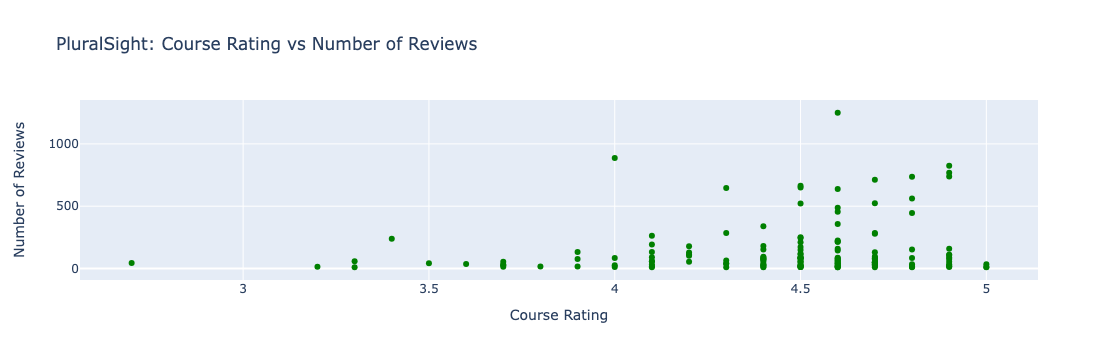

In [191]:
# Scatter plot between course rating and number of reviews for Udemy
fig_udemy = px.scatter(udemy_df, x='course_rating', y='course_no_of_reviews', 
                       title='Udemy: Course Rating vs Number of Reviews',
                       labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'})
fig_udemy.show()

# Scatter plot between course rating and number of reviews for Coursera
fig_coursera = px.scatter(coursera_df, x='course_rating', y='course_no_of_reviews', 
                          title='Coursera: Course Rating vs Number of Reviews',
                          labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'},
                          color_discrete_sequence=['orange'])
fig_coursera.show()

# Scatter plot between course rating and number of reviews for PluralSight
fig_pluralsight = px.scatter(pluralsight_df, x='course_rating', y='course_no_of_reviews', 
                             title='PluralSight: Course Rating vs Number of Reviews',
                             labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'},
                            color_discrete_sequence=['green'])
fig_pluralsight.show()

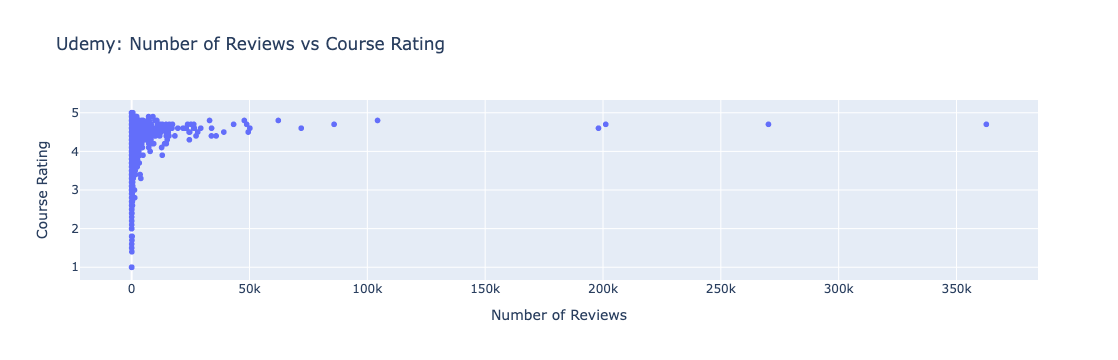

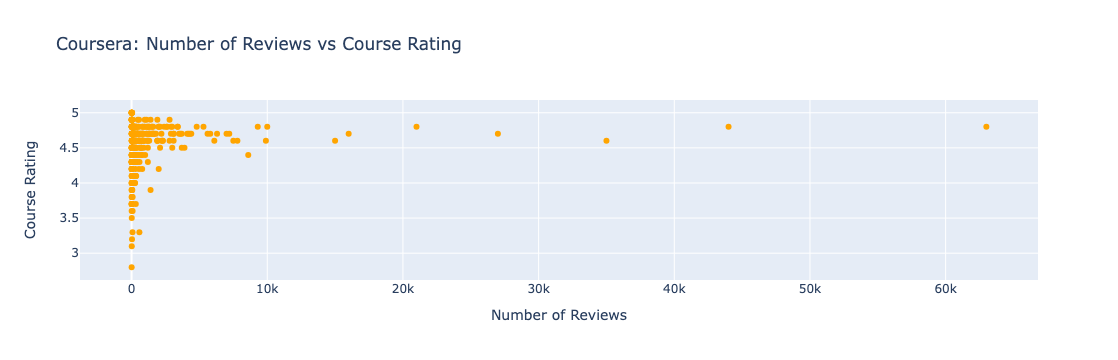

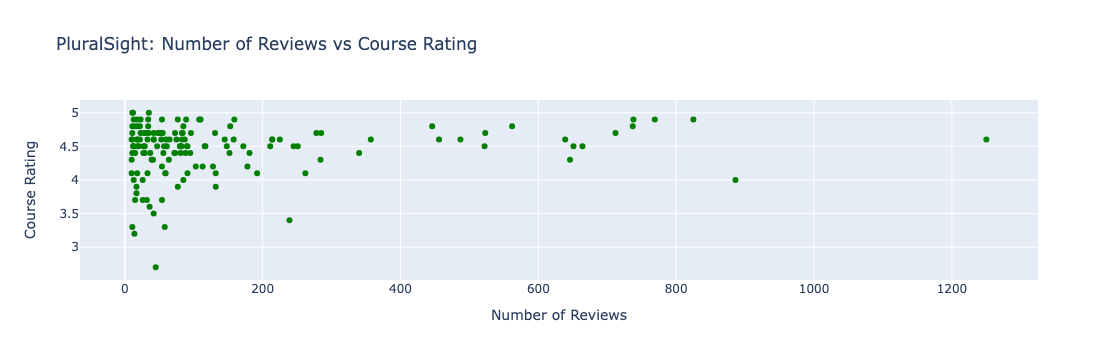

In [194]:
# Scatter plot between course rating and number of reviews for Udemy
fig_udemy = px.scatter(udemy_df, x='course_no_of_reviews', y='course_rating', 
                       title='Udemy: Number of Reviews vs Course Rating',
                       labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'})
fig_udemy.show()

# Scatter plot between course rating and number of reviews for Coursera
fig_coursera = px.scatter(coursera_df, x='course_no_of_reviews', y='course_rating', 
                          title='Coursera: Number of Reviews vs Course Rating',
                          labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'},
                          color_discrete_sequence=['orange'])
fig_coursera.show()

# Scatter plot between course rating and number of reviews for PluralSight
fig_pluralsight = px.scatter(pluralsight_df, x='course_no_of_reviews', y='course_rating', 
                             title='PluralSight: Number of Reviews vs Course Rating',
                             labels={'course_rating': 'Course Rating', 'course_no_of_reviews': 'Number of Reviews'},
                            color_discrete_sequence=['green'])
fig_pluralsight.show()

In [192]:
# Group the data by site
grouped_data = df.groupby('site')

# Calculate mean, median, etc. for each site
summary_stats = grouped_data['course_rating'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the summary statistics
print("Summary Statistics for course per Site:")
print(summary_stats)

Summary Statistics for course per Site:
          mean  median       std  min  max
site                                      
ce    4.539254     4.6  0.315418  2.8  5.0
ps    4.445578     4.5  0.392783  2.7  5.0
ud    4.229092     4.3  0.511560  1.0  5.0


#### Though as per the mean, median, std, min and max, the site coursera has highest rating followed by Plural sight and atlast Udemy. But as per the scatter plot, when compared with the Number of Reviews Udemy is the best platform followed by Coursera and at last Pluralsight

#### RQ 4. Vizualize the histogram of course duration with respect to count of courses
- Box plot and histogram to see the distribution

In [176]:
df = concatenated_course_data_copy.copy()

In [177]:
df = df.dropna(subset=['course_duration'])

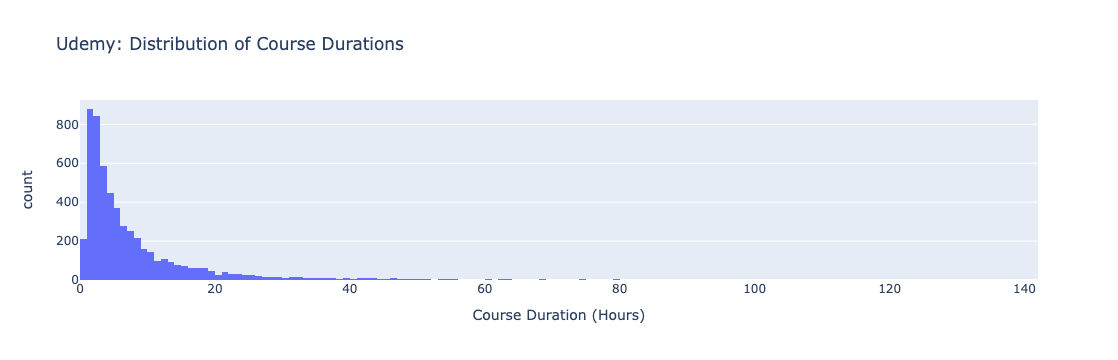

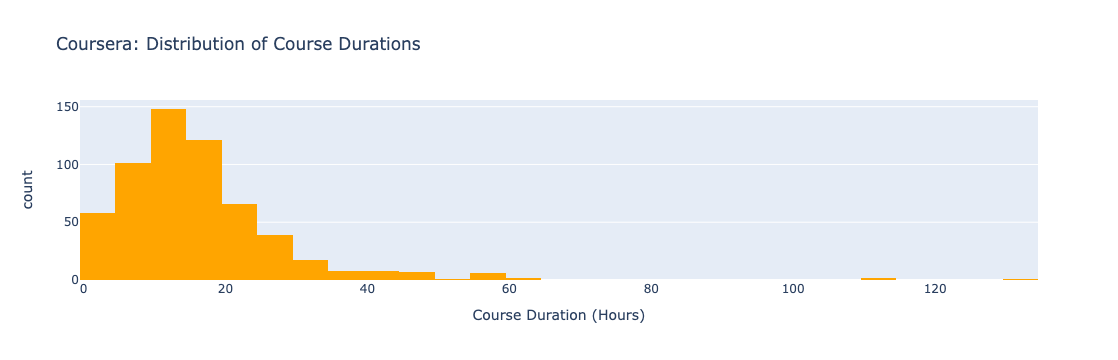

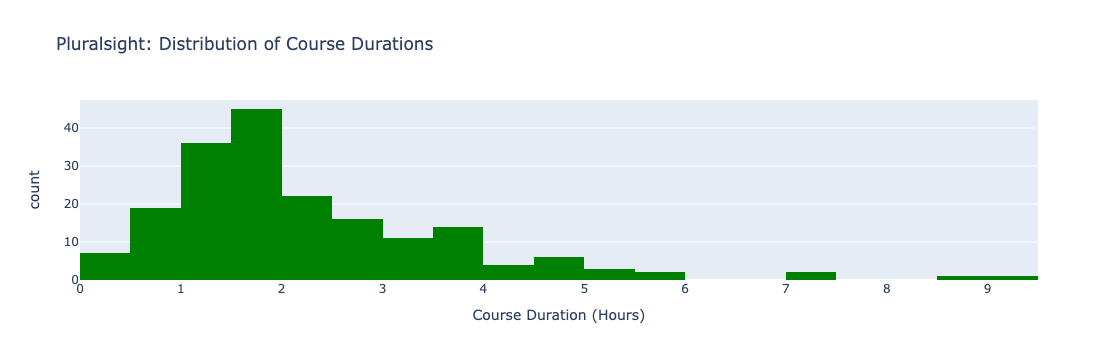

In [178]:
# Histogram of course durations for Udemy
udemy_df = df[df['site'] == 'ud']
fig_udemy = px.histogram(udemy_df, x='course_duration', 
                         title='Udemy: Distribution of Course Durations',
                         labels={'course_duration': 'Course Duration (Hours)', 'count': 'Frequency'})
fig_udemy.show()

# Histogram of course durations for Coursera
coursera_df = df[df['site'] == 'ce']
fig_coursera = px.histogram(coursera_df, x='course_duration', 
                            title='Coursera: Distribution of Course Durations',
                            labels={'course_duration': 'Course Duration (Hours)', 'count': 'Frequency'},
                           color_discrete_sequence=['orange'])
fig_coursera.show()

# Histogram of course durations for PluralSight
pluralsight_df = df[df['site'] == 'ps']
fig_pluralsight = px.histogram(pluralsight_df, x='course_duration', 
                               title='Pluralsight: Distribution of Course Durations',
                               labels={'course_duration': 'Course Duration (Hours)', 'count': 'Frequency'},
                              color_discrete_sequence=['green'])
fig_pluralsight.show()


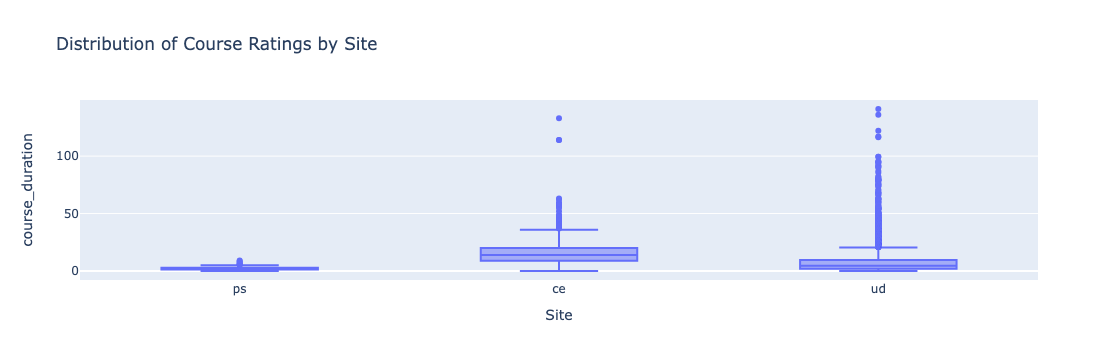

In [179]:
# Box plot of course ratings for all three sites
fig = px.box(df, x='site', y='course_duration',
             title='Distribution of Course Ratings by Site',
             labels={'site': 'Site', 'course_rating': 'Course Rating'})
fig.show()

In [180]:
# Group the data by site
grouped_data = df.groupby('site')

# Calculate mean, median, etc. for each site
summary_stats = grouped_data['course_duration'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the summary statistics
print("Summary Statistics for course per Site:")
print(summary_stats)

Summary Statistics for course per Site:
           mean     median        std       min         max
site                                                       
ce    16.205128  14.000000  12.929696  0.000000  133.000000
ps     2.278561   1.883333   1.461057  0.090000    9.105278
ud     8.149829   4.500000  11.375901  0.033333  141.000000


#### RQ 5. Bubble chart showing the relationship between course rating, duration, and number of enrollments 

In [212]:
df = concatenated_course_data_copy.copy()

In [213]:
df = df.dropna(subset=['course_no_of_reviews', 'course_no_of_enrolled', 'course_duration'])

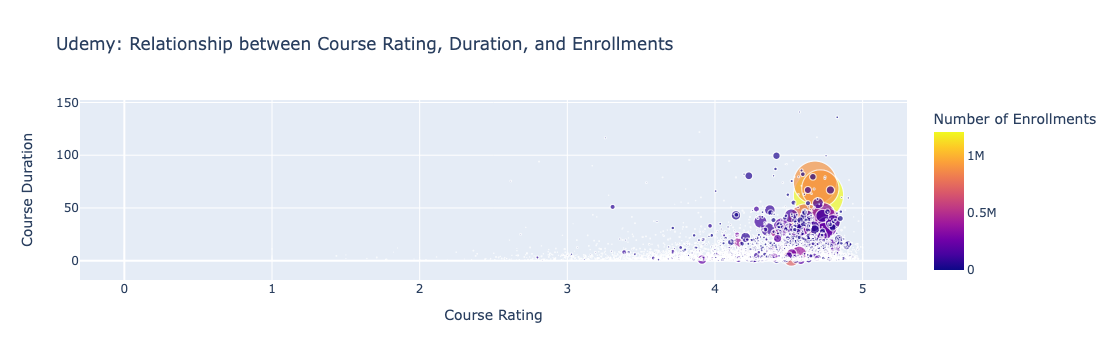

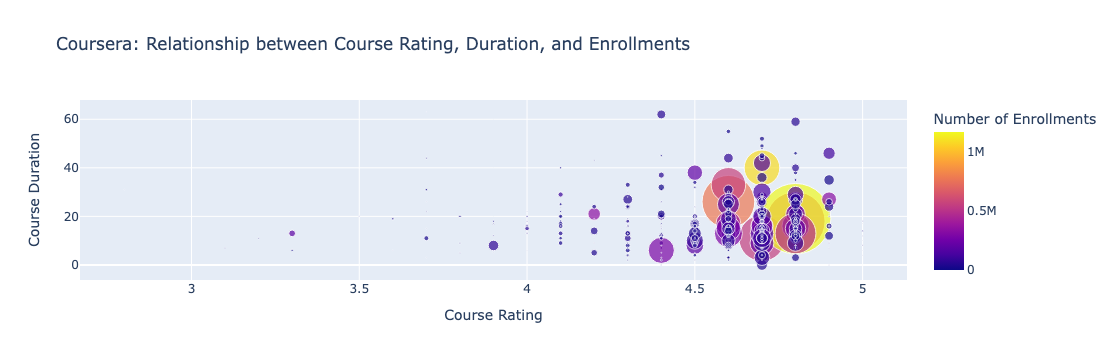

In [214]:

# Create a bubble chart
udemy_df = df[df['site'] == 'ud']
fig = px.scatter(udemy_df, x='course_rating', y='course_duration', size='course_no_of_reviews', 
                 color='course_no_of_enrolled', 
                 title='Udemy: Relationship between Course Rating, Duration, and Enrollments',
                 labels={'course_rating': 'Course Rating', 'course_duration': 'Course Duration', 
                         'course_no_of_reviews': 'Number of Reviews', 'course_no_of_enrolled': 'Number of Enrollments'},
                 hover_name='course_title', size_max=50)
fig.show()

# Create a bubble chart
coursera_df = df[df['site'] == 'ce']
fig = px.scatter(coursera_df, x='course_rating', y='course_duration', size='course_no_of_reviews', 
                 color='course_no_of_enrolled', 
                 title='Coursera: Relationship between Course Rating, Duration, and Enrollments',
                 labels={'course_rating': 'Course Rating', 'course_duration': 'Course Duration', 
                         'course_no_of_reviews': 'Number of Reviews', 'course_no_of_enrolled': 'Number of Enrollments'},
                 hover_name='course_title', size_max=50)
fig.show()
